In [14]:
import os
import time
from copy import copy
from pathlib import Path
from pdb import set_trace

import matplotlib.pyplot as plt
import numpy as np
import psutil
import src.se3.visualization as viz
import torch
import torch.nn as nn
from se3_transformer_pytorch.irr_repr import rot

from src.ri_distances.SGW.risgw import RISGW_loss
from src.se3.torch_funcs import MachineScaleChecker, visualize_prediction, get_model
from src.se3.visualization import viz_point_cloud
from src.ri_distances.pnt_cloud_generation import get_src_scaled_spirals, get_src_shifted_spirals, get_spiral,center

import wandb

plt.style.use('ggplot')
torch.set_default_dtype(torch.float32) # works best in float64


## R1 Overfit plot

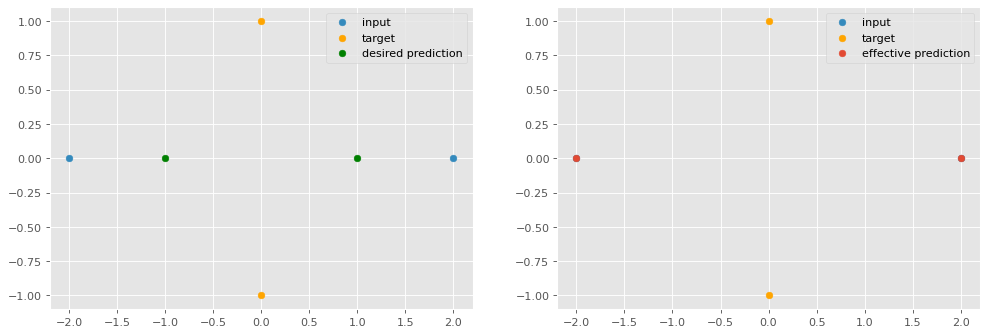

In [29]:
points_tens, target_points_tens = get_r1_src_target() 

predicted_deltas_tens = (predict(transformer,points_tens)
                         .cpu()
                         .reshape(points_tens.shape))
predicted_points_tens = points_tens + predicted_deltas_tens

points = to_numpy_array(points_tens)
target_points = to_numpy_array(target_points_tens)
predicted_points = to_numpy_array(predicted_points_tens)

fig,axes = plt.subplots(1,2,figsize=(15,5))
plot_r1_exp(points,target_points,predicted_points,axes)